In [2]:
import numpy as np
import os
import glob
import re
print(os.getcwd())
from scipy.stats import linregress
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

C:\Users\Sebas


In [3]:
def modelo_1(x, A, B):
    return A / np.sqrt(x) + B

# Función 2: A/x^c + B
def modelo_2(x, A, c, B):
    return A / (x ** c) + B

[N =  20] → Desviación típica: 0.10191 Maximo: 0.22366
[N =  28] → Desviación típica: 0.10188 Maximo: 0.27090
[N =  40] → Desviación típica: 0.07223 Maximo: 0.21781
[N =  56] → Desviación típica: 0.06728 Maximo: 0.20579
[N =  80] → Desviación típica: 0.06352 Maximo: 0.23449
[N =  112] → Desviación típica: 0.05968 Maximo: 0.21485
[N =  160] → Desviación típica: 0.04835 Maximo: 0.22060
[N =  224] → Desviación típica: 0.04255 Maximo: 0.20820
[N =  320] → Desviación típica: 0.03575 Maximo: 0.17958


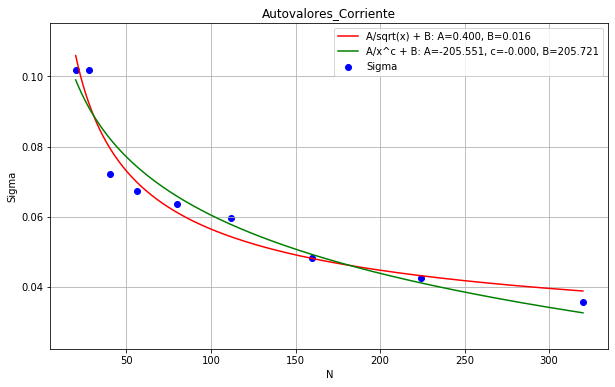

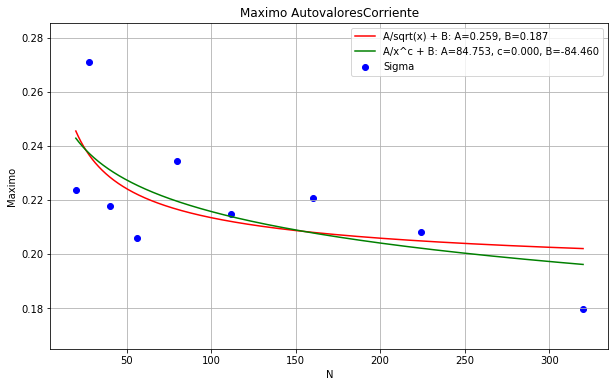

[N =  20] → Desviación típica: 0.10522 Maximo: 0.22366
[N =  28] → Desviación típica: 0.09004 Maximo: 0.27090
[N =  40] → Desviación típica: 0.06901 Maximo: 0.21781
[N =  56] → Desviación típica: 0.05692 Maximo: 0.15758
[N =  80] → Desviación típica: 0.05606 Maximo: 0.17357
[N =  112] → Desviación típica: 0.05212 Maximo: 0.18939
[N =  160] → Desviación típica: 0.04313 Maximo: 0.20969
[N =  224] → Desviación típica: 0.03765 Maximo: 0.20820
[N =  320] → Desviación típica: 0.03206 Maximo: 0.17088


ValueError: operands could not be broadcast together with shapes (9,) (18,) 

In [7]:
#Corriente
plantilla_archivo = "Corriente_Positivos_{}.dat"

ruta_directorio = r"C:\Users\Sebas\Desktop\Matlab_TFG\ETH_Scaling"

# Rango de energía que quieres considerar
energia_min = -3.1
energia_max = -2.3


orden_deseado = [20, 28, 40, 56, 80, 112, 160, 224, 320]
desviacion_corr = []
maximo_corr = []
# Crear lista de archivos filtrados y ordenados según esa lista

for numero in orden_deseado:
    nombre_archivo = plantilla_archivo.format(numero)
    ruta_archivo = os.path.join(ruta_directorio, nombre_archivo)
    if not os.path.exists(ruta_archivo):
        print(f"[{nombre_archivo}] → No encontrado.")
        continue

    try:
        datos = np.loadtxt(ruta_archivo)
        energias = datos[:, 0]
        auto_pos = datos[:, 1]
        auto_neg = datos[:, 2]
        
        filtro = (energias >= energia_min) & (energias <= energia_max)
        magnitudes_filtradas = np.concatenate([auto_pos[filtro],auto_neg[filtro]])

        if len(magnitudes_filtradas) == 0:
            print(f"[{nombre_archivo}] → No hay datos en el rango especificado.")
        else:
            media = np.mean(magnitudes_filtradas)
            desviacion = np.std(magnitudes_filtradas)
            desviacion_corr.append(desviacion)
            max_abs = np.max(np.abs(magnitudes_filtradas))
            maximo_corr.append(max_abs)
            print(f"[N =  {numero}] → Desviación típica: {desviacion:.5f} Maximo: {max_abs:.5f}")
    except Exception as e:
        print(f"[{nombre_archivo}] → Error al procesar: {e}")

#Representar Autovalores        
popt_1, _ = curve_fit(modelo_1, orden_deseado, desviacion_corr,maxfev = 10000)
A_1, B_1 = popt_1  # Parámetros ajustados de la función 1

# Ajustar a la función 2
popt_2, _ = curve_fit(modelo_2, orden_deseado, desviacion_corr, maxfev = 10000)
A_2, c_2, B_2 = popt_2  # Parámetros ajustados de la función 2

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar los datos (sigmas vs orden_deseado)
plt.scatter(orden_deseado, desviacion_corr, color='blue', label='Sigma')

# Graficar los ajustes
x_vals = np.linspace(min(orden_deseado), max(orden_deseado), 1000)

# Ajuste de la función 1
plt.plot(x_vals, modelo_1(x_vals, *popt_1), color='red', label=f'A/sqrt(x) + B: A={A_1:.3f}, B={B_1:.3f}')

# Ajuste de la función 2
plt.plot(x_vals, modelo_2(x_vals, *popt_2), color='green', label=f'A/x^c + B: A={A_2:.3f}, c={c_2:.3f}, B={B_2:.3f}')

# Etiquetas y título
plt.xlabel('N')
plt.ylabel('Sigma')
plt.title('Autovalores_Corriente')
plt.legend()

# Mostrar gráfico
plt.grid(True)
plt.show()

#Representar Maximo    
popt_1, _ = curve_fit(modelo_1, orden_deseado, maximo_corr,maxfev = 10000)
A_1, B_1 = popt_1  # Parámetros ajustados de la función 1

# Ajustar a la función 2
popt_2, _ = curve_fit(modelo_2, orden_deseado, maximo_corr, maxfev = 10000)
A_2, c_2, B_2 = popt_2  # Parámetros ajustados de la función 2

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar los datos (sigmas vs orden_deseado)
plt.scatter(orden_deseado, maximo_corr, color='blue', label='Sigma')

# Graficar los ajustes
x_vals = np.linspace(min(orden_deseado), max(orden_deseado), 1000)

# Ajuste de la función 1
plt.plot(x_vals, modelo_1(x_vals, *popt_1), color='red', label=f'A/sqrt(x) + B: A={A_1:.3f}, B={B_1:.3f}')

# Ajuste de la función 2
plt.plot(x_vals, modelo_2(x_vals, *popt_2), color='green', label=f'A/x^c + B: A={A_2:.3f}, c={c_2:.3f}, B={B_2:.3f}')

# Etiquetas y título
plt.xlabel('N')
plt.ylabel('Maximo')
plt.title('Maximo AutovaloresCorriente')
plt.legend()

# Mostrar gráfico
plt.grid(True)
plt.show()

[N =  20] → Desviación típica: 0.08790 Maximo: 0.22628
[N =  28] → Desviación típica: 0.07061 Maximo: 0.19377
[N =  40] → Desviación típica: 0.06099 Maximo: 0.19425
[N =  56] → Desviación típica: 0.05123 Maximo: 0.18547
[N =  80] → Desviación típica: 0.04538 Maximo: 0.26765
[N =  112] → Desviación típica: 0.03935 Maximo: 0.25223
[N =  160] → Desviación típica: 0.03331 Maximo: 0.19437
[N =  224] → Desviación típica: 0.02833 Maximo: 0.23339
[N =  320] → Desviación típica: 0.02383 Maximo: 0.21381


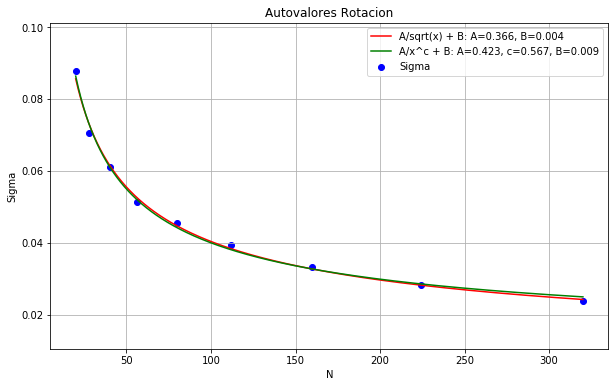

C:\Users\Sebas\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


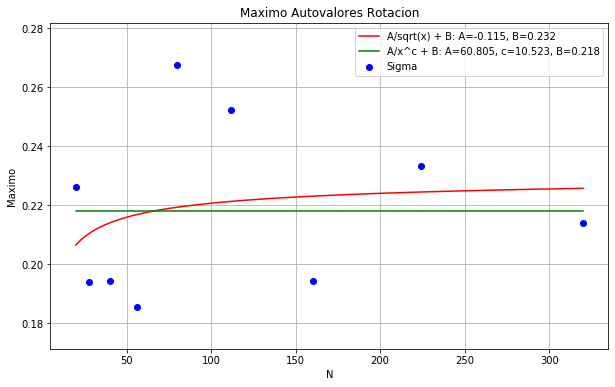

In [6]:
#Rotación
plantilla_archivo = "ETH_Rotacion_{}.txt"

ruta_directorio = r"C:\Users\Sebas\Desktop\Matlab_TFG\ETH_Scaling"

# Rango de energía que quieres considerar
energia_min = -3.1
energia_max = -2.3

#Buscar todos los archivos que coincidan
#archivos = glob.glob(patron)

orden_deseado = [20, 28, 40, 56, 80, 112, 160, 224, 320]
maximo_rot = []
# Crear lista de archivos filtrados y ordenados según esa lista
desviacion_rot = []
for numero in orden_deseado:
    nombre_archivo = plantilla_archivo.format(numero)
    ruta_archivo = os.path.join(ruta_directorio, nombre_archivo)
    if not os.path.exists(ruta_archivo):
        print(f"[{nombre_archivo}] → No encontrado.")
        continue

    try:
        datos = np.loadtxt(ruta_archivo)
        energias = datos[:, 0]
        auto_re_1 = datos[:, 8]
        auto_re_2 = datos[:, 9]
        auto_re_3 = datos[:, 10]
        
        filtro = (energias >= energia_min) & (energias <= energia_max)
        magnitudes_filtradas = np.concatenate([auto_re_1[filtro],auto_re_2[filtro],auto_re_3[filtro]])

        if len(magnitudes_filtradas) == 0:
            print(f"[{nombre_archivo}] → No hay datos en el rango especificado.")
        else:
            media = np.mean(magnitudes_filtradas)
            desviacion = np.std(magnitudes_filtradas)
            desviacion_rot.append(desviacion)
            max_abs_rot = np.max(np.abs(magnitudes_filtradas))
            maximo_rot.append(max_abs_rot)
            print(f"[N =  {numero}] → Desviación típica: {desviacion:.5f} Maximo: {max_abs_rot:.5f}")
    except Exception as e:
        print(f"[{nombre_archivo}] → Error al procesar: {e}")

#Representar maximo    
popt_1, _ = curve_fit(modelo_1, orden_deseado, desviacion_rot,maxfev = 10000)
A_1, B_1 = popt_1  # Parámetros ajustados de la función 1

# Ajustar a la función 2
popt_2, _ = curve_fit(modelo_2, orden_deseado, desviacion_rot, maxfev = 10000)
A_2, c_2, B_2 = popt_2  # Parámetros ajustados de la función 2

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar los datos (sigmas vs orden_deseado)
plt.scatter(orden_deseado, desviacion_rot, color='blue', label='Sigma')

# Graficar los ajustes
x_vals = np.linspace(min(orden_deseado), max(orden_deseado), 1000)

# Ajuste de la función 1
plt.plot(x_vals, modelo_1(x_vals, *popt_1), color='red', label=f'A/sqrt(x) + B: A={A_1:.3f}, B={B_1:.3f}')

# Ajuste de la función 2
plt.plot(x_vals, modelo_2(x_vals, *popt_2), color='green', label=f'A/x^c + B: A={A_2:.3f}, c={c_2:.3f}, B={B_2:.3f}')

# Etiquetas y título
plt.xlabel('N')
plt.ylabel('Sigma')
plt.title('Autovalores Rotacion')
plt.legend()

# Mostrar gráfico
plt.grid(True)
plt.show()  

#Representar maximo
popt_1, _ = curve_fit(modelo_1, orden_deseado, maximo_rot,maxfev = 10000)
A_1, B_1 = popt_1  # Parámetros ajustados de la función 1

# Ajustar a la función 2
popt_2, _ = curve_fit(modelo_2, orden_deseado, maximo_rot, maxfev = 10000)
A_2, c_2, B_2 = popt_2  # Parámetros ajustados de la función 2

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar los datos (sigmas vs orden_deseado)
plt.scatter(orden_deseado, maximo_rot, color='blue', label='Sigma')

# Graficar los ajustes
x_vals = np.linspace(min(orden_deseado), max(orden_deseado), 1000)

# Ajuste de la función 1
plt.plot(x_vals, modelo_1(x_vals, *popt_1), color='red', label=f'A/sqrt(x) + B: A={A_1:.3f}, B={B_1:.3f}')

# Ajuste de la función 2
plt.plot(x_vals, modelo_2(x_vals, *popt_2), color='green', label=f'A/x^c + B: A={A_2:.3f}, c={c_2:.3f}, B={B_2:.3f}')

# Etiquetas y título
plt.xlabel('N')
plt.ylabel('Maximo')
plt.title('Maximo Autovalores Rotacion')
plt.legend()

# Mostrar gráfico
plt.grid(True)
plt.show()        


In [5]:
auto_re_

NameError: name 'auto_re_' is not defined

 N = 20 Sigma : 0.02629 Maximo : 0.08621
 N = 28 Sigma : 0.01850 Maximo : 0.06531
 N = 40 Sigma : 0.01525 Maximo : 0.05184
 N = 56 Sigma : 0.01538 Maximo : 0.05416
 N = 80 Sigma : 0.01275 Maximo : 0.04449
 N = 112 Sigma : 0.01065 Maximo : 0.03961
 N = 160 Sigma : 0.00978 Maximo : 0.04044
 N = 224 Sigma : 0.00837 Maximo : 0.03721
 N = 320 Sigma : 0.00738 Maximo : 0.02860


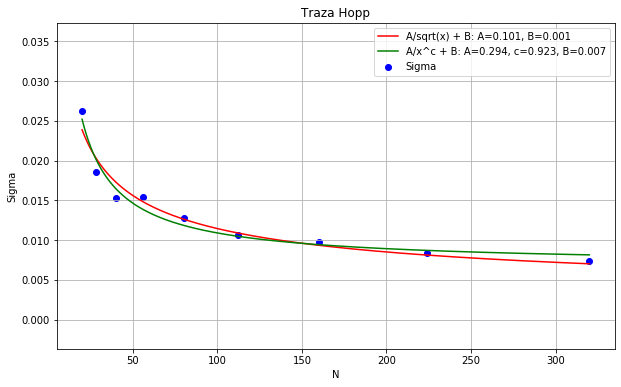

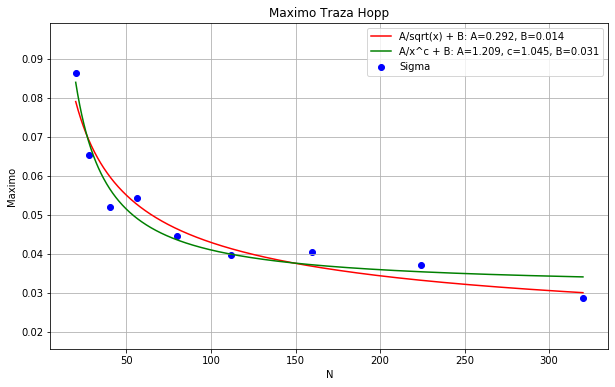

In [11]:
#Traza Hopping
plantilla_archivo = "ETH_Hopping_{}.txt"
energia_min = -3.1
energia_max = -2.3

# Rutas a los archivos
ruta_observado = r"C:\Users\Sebas\Desktop\Matlab_TFG\ETH_Scaling"
ruta_referencia = r"C:\Users\Sebas\Desktop\Matlab_TFG\ETH_Scaling\micro_hopping.dat"

# Leer los datos de referencia (estos no cambian)
ref = np.loadtxt(ruta_referencia)
energia_ref = ref[:, 0]
magnitud_real = ref[:, 2]  # Tercera columna, magnitud real
sigma_traza_Hopp =[]
orden_deseado = [20, 28, 40, 56, 80, 112, 160, 224, 320]
archivos_observados=[]
maximo_traza_hopp = []
for numero in orden_deseado:
    nombre_archivo = plantilla_archivo.format(numero)
    ruta_archivo = os.path.join(ruta_observado, nombre_archivo)
    archivo = ruta_archivo
    if not os.path.exists(ruta_observado):
        print(f"[{nombre_archivo}] → No encontrado.")
        continue
    # Leer datos del archivo observado
    datos_obs = np.loadtxt(archivo)
    energia_obs = datos_obs[:, 0]  # Columna de energías observadas
    magnitud_obs = datos_obs[:, 5]  # Columna de magnitudes observadas
    
    filtro = (energia_obs >= energia_min) & (energia_obs <= energia_max)
    energia_filtradas = energia_obs[filtro]
    magnitudes_filtradas = magnitud_obs[filtro]

    # Interpolación de las magnitudes reales para las energías observadas
    magnitud_interp = np.interp(energia_filtradas, energia_ref, magnitud_real)
  
    # Calcular los residuos: la diferencia entre magnitudes observadas y las interpoladas
    residuos = magnitud_interp - magnitudes_filtradas/3   

    # Calcular la desviación estándar de los residuos
    
    sigma_residuos = np.std(residuos)
    max_abs = np.max(np.abs(residuos))
    sigma_traza_Hopp.append(sigma_residuos)
    maximo_traza_hopp.append(max_abs)
    # Imprimir los resultados para cada archivo
    print(f" N = {numero} Sigma : {sigma_residuos:.5f} Maximo : {max_abs:.5f}")
    
popt_1, _ = curve_fit(modelo_1, orden_deseado, sigma_traza_Hopp,maxfev = 10000)
A_1, B_1 = popt_1  # Parámetros ajustados de la función 1

# Ajustar a la función 2
popt_2, _ = curve_fit(modelo_2, orden_deseado, sigma_traza_Hopp, maxfev = 10000)
A_2, c_2, B_2 = popt_2  # Parámetros ajustados de la función 2

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar los datos (sigmas vs orden_deseado)
plt.scatter(orden_deseado, sigma_traza_Hopp, color='blue', label='Sigma')

# Graficar los ajustes
x_vals = np.linspace(min(orden_deseado), max(orden_deseado), 1000)

# Ajuste de la función 1
plt.plot(x_vals, modelo_1(x_vals, *popt_1), color='red', label=f'A/sqrt(x) + B: A={A_1:.3f}, B={B_1:.3f}')

# Ajuste de la función 2
plt.plot(x_vals, modelo_2(x_vals, *popt_2), color='green', label=f'A/x^c + B: A={A_2:.3f}, c={c_2:.3f}, B={B_2:.3f}')

# Etiquetas y título
plt.xlabel('N')
plt.ylabel('Sigma')
plt.title('Traza Hopp')
plt.legend()

# Mostrar gráfico
plt.grid(True)
plt.show()    

popt_1, _ = curve_fit(modelo_1, orden_deseado, maximo_traza_hopp,maxfev = 10000)
A_1, B_1 = popt_1  # Parámetros ajustados de la función 1

# Ajustar a la función 2
popt_2, _ = curve_fit(modelo_2, orden_deseado, maximo_traza_hopp, maxfev = 10000)
A_2, c_2, B_2 = popt_2  # Parámetros ajustados de la función 2

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar los datos (sigmas vs orden_deseado)
plt.scatter(orden_deseado, maximo_traza_hopp, color='blue', label='Sigma')

# Graficar los ajustes
x_vals = np.linspace(min(orden_deseado), max(orden_deseado), 1000)

# Ajuste de la función 1
plt.plot(x_vals, modelo_1(x_vals, *popt_1), color='red', label=f'A/sqrt(x) + B: A={A_1:.3f}, B={B_1:.3f}')

# Ajuste de la función 2
plt.plot(x_vals, modelo_2(x_vals, *popt_2), color='green', label=f'A/x^c + B: A={A_2:.3f}, c={c_2:.3f}, B={B_2:.3f}')

# Etiquetas y título
plt.xlabel('N')
plt.ylabel('Maximo')
plt.title('Maximo Traza Hopp')
plt.legend()

# Mostrar gráfico
plt.grid(True)
plt.show()        

 N = 20 Sigma : 0.07694 Maximo : 0.24509
 N = 28 Sigma : 0.06424 Maximo : 0.19282
 N = 40 Sigma : 0.05371 Maximo : 0.17453
 N = 56 Sigma : 0.04713 Maximo : 0.18104
 N = 80 Sigma : 0.04053 Maximo : 0.16539
 N = 112 Sigma : 0.03471 Maximo : 0.18081
 N = 160 Sigma : 0.03036 Maximo : 0.16256
 N = 224 Sigma : 0.02547 Maximo : 0.11959
 N = 320 Sigma : 0.02189 Maximo : 0.09223


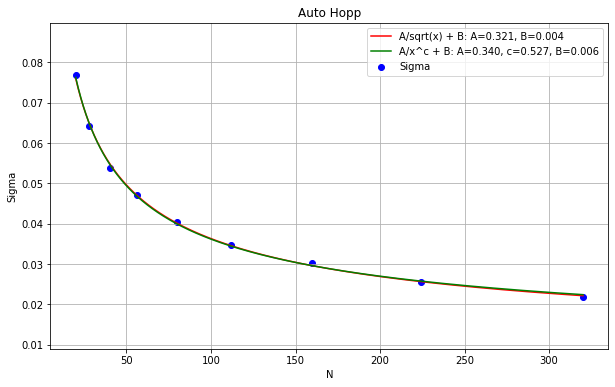

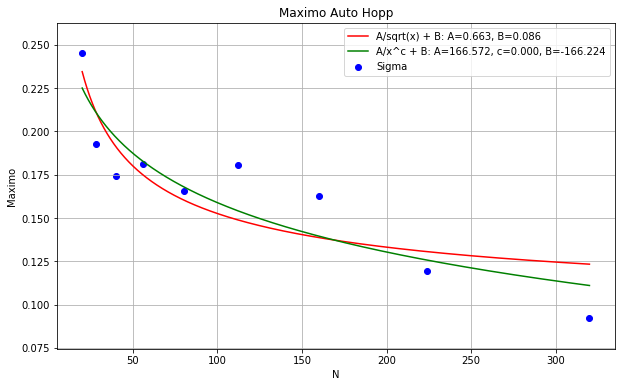

In [12]:
#Autovalores Hopping 
plantilla_archivo = "ETH_Hopping_Autoval_Full_{}.dat"
energia_min = -3.1
energia_max = -2.3

# Rutas a los archivos
ruta_observado = r"C:\Users\Sebas\Desktop\Matlab_TFG\ETH_Scaling"
ruta_referencia = r"C:\Users\Sebas\Desktop\Matlab_TFG\ETH_Scaling\micro_hopping.dat"

# Leer los datos de referencia (estos no cambian)
ref = np.loadtxt(ruta_referencia)
energia_ref = ref[:, 0]
magnitud_real = ref[:, 2]  # Tercera columna, magnitud real
sigma_Auto_1 = []
max_Auto_1 = []
orden_deseado = [20, 28, 40, 56, 80, 112, 160, 224, 320]
archivos_observados=[]
for numero in orden_deseado:
    nombre_archivo = plantilla_archivo.format(numero)
    ruta_archivo = os.path.join(ruta_observado, nombre_archivo)
    archivo = ruta_archivo
    archivos_observados.append(archivo)
    if not os.path.exists(ruta_observado):
        print(f"[{nombre_archivo}] → No encontrado.")
        continue
    # Leer datos del archivo observado
    datos_obs = np.loadtxt(archivo)
    energia_obs = datos_obs[:, 0]  # Columna de energías observadas
    magnitud_obs = datos_obs[:, 1]  # Columna de magnitudes observadas
    
    filtro = (energia_obs >= energia_min) & (energia_obs <= energia_max)
    energia_filtradas = energia_obs[filtro]
    magnitudes_filtradas = magnitud_obs[filtro]

    # Interpolación de las magnitudes reales para las energías observadas
    magnitud_interp = np.interp(energia_filtradas, energia_ref, magnitud_real)
  
    # Calcular los residuos: la diferencia entre magnitudes observadas y las interpoladas
    residuos = magnitud_interp - magnitudes_filtradas   

    # Calcular la desviación estándar de los residuos
    sigma_residuos = np.std(residuos)
    max_abs = np.max(np.abs(residuos))
    sigma_Auto_1.append(sigma_residuos)
    max_Auto_1.append(max_abs)

    # Imprimir los resultados para cada archivo
    print(f" N = {numero} Sigma : {sigma_residuos:.5f} Maximo : {max_abs:.5f}")
    
popt_1, _ = curve_fit(modelo_1, orden_deseado, sigma_Auto_1,maxfev = 10000)    
A_1, B_1 = popt_1  # Parámetros ajustados de la función 1

# Ajustar a la función 2
popt_2, _ = curve_fit(modelo_2, orden_deseado, sigma_Auto_1, maxfev = 10000)
A_2, c_2, B_2 = popt_2  # Parámetros ajustados de la función 2

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar los datos (sigmas vs orden_deseado)
plt.scatter(orden_deseado, sigma_Auto_1, color='blue', label='Sigma')

# Graficar los ajustes
x_vals = np.linspace(min(orden_deseado), max(orden_deseado), 1000)

# Ajuste de la función 1
plt.plot(x_vals, modelo_1(x_vals, *popt_1), color='red', label=f'A/sqrt(x) + B: A={A_1:.3f}, B={B_1:.3f}')

# Ajuste de la función 2
plt.plot(x_vals, modelo_2(x_vals, *popt_2), color='green', label=f'A/x^c + B: A={A_2:.3f}, c={c_2:.3f}, B={B_2:.3f}')

# Etiquetas y título
plt.xlabel('N')
plt.ylabel('Sigma')
plt.title('Auto Hopp')
plt.legend()

# Mostrar gráfico
plt.grid(True)
plt.show()       

popt_1, _ = curve_fit(modelo_1, orden_deseado, max_Auto_1,maxfev = 10000)    
A_1, B_1 = popt_1  # Parámetros ajustados de la función 1

# Ajustar a la función 2
popt_2, _ = curve_fit(modelo_2, orden_deseado, max_Auto_1, maxfev = 10000)
A_2, c_2, B_2 = popt_2  # Parámetros ajustados de la función 2

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar los datos (sigmas vs orden_deseado)
plt.scatter(orden_deseado, max_Auto_1, color='blue', label='Sigma')

# Graficar los ajustes
x_vals = np.linspace(min(orden_deseado), max(orden_deseado), 1000)

# Ajuste de la función 1
plt.plot(x_vals, modelo_1(x_vals, *popt_1), color='red', label=f'A/sqrt(x) + B: A={A_1:.3f}, B={B_1:.3f}')

# Ajuste de la función 2
plt.plot(x_vals, modelo_2(x_vals, *popt_2), color='green', label=f'A/x^c + B: A={A_2:.3f}, c={c_2:.3f}, B={B_2:.3f}')

# Etiquetas y título
plt.xlabel('N')
plt.ylabel('Maximo')
plt.title('Maximo Auto Hopp')
plt.legend()

# Mostrar gráfico
plt.grid(True)
plt.show()   

 N = 20 Sigma : 0.07230 Maximo : 0.15888
 N = 28 Sigma : 0.06152 Maximo : 0.15756
 N = 40 Sigma : 0.05150 Maximo : 0.13769
 N = 56 Sigma : 0.04455 Maximo : 0.16599
 N = 80 Sigma : 0.03847 Maximo : 0.13310
 N = 112 Sigma : 0.03303 Maximo : 0.16631
 N = 160 Sigma : 0.02874 Maximo : 0.14528
 N = 224 Sigma : 0.02405 Maximo : 0.09318
 N = 320 Sigma : 0.02060 Maximo : 0.09927


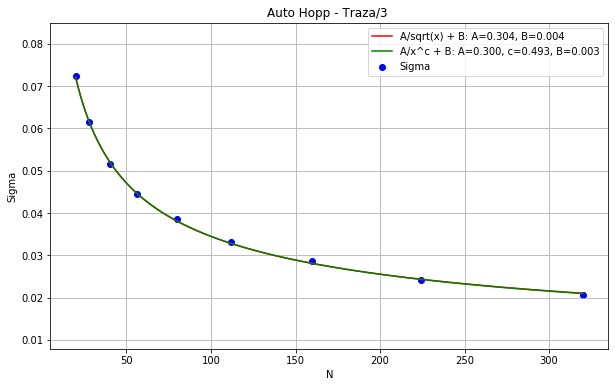

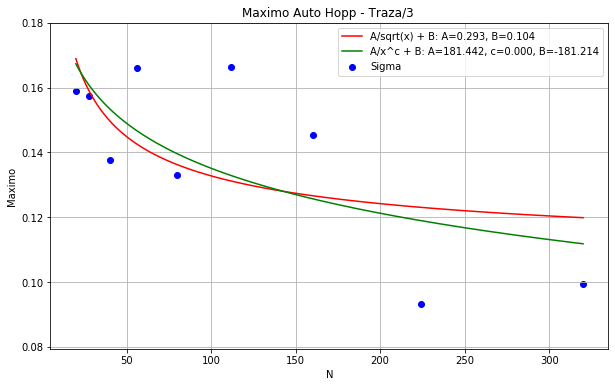

In [13]:
#Autovalores Hopping 2 (Autoval- Traza)
plantilla_archivo = "ETH_Hopping_{}.txt"
energia_min = -3.1
energia_max = -2.3
sigma_Auto_2 = []
# Rutas a los archivos
ruta_observado = r"C:\Users\Sebas\Desktop\Matlab_TFG\ETH_Scaling"

# Leer los datos de referencia (estos no cambian)
orden_deseado = [20, 28, 40, 56, 80, 112, 160, 224, 320]
max_Auto_2 = []
for numero in orden_deseado:
    nombre_archivo = plantilla_archivo.format(numero)
    ruta_archivo = os.path.join(ruta_observado, nombre_archivo)
    archivo = ruta_archivo
    if not os.path.exists(ruta_observado):
        print(f"[{nombre_archivo}] → No encontrado.")
        continue
    # Leer datos del archivo observado
    datos_obs = np.loadtxt(archivo)
    energia_obs = datos_obs[:, 0]  # Columna de energías observadas
    traza = datos_obs[:, 5]  # Columna de magnitudes observadas
    autoval_1 = datos_obs[:, 6] 
    autoval_2 = datos_obs[:, 7]  
    autoval_3 = datos_obs[:, 8]  
    filtro = (energia_obs >= energia_min) & (energia_obs <= energia_max)
    traza_filtrada = traza[filtro]
    autoval_1_filtrada = autoval_1[filtro]
    autoval_2_filtrada = autoval_2[filtro]
    autoval_3_filtrada = autoval_3[filtro]
    
    residuo_1 = traza_filtrada/3-autoval_1_filtrada
    residuo_2 = traza_filtrada/3-autoval_2_filtrada
    residuo_3 = traza_filtrada/3-autoval_3_filtrada
    
    residuo = np.concatenate([residuo_1,residuo_2,residuo_3])

    # Calcular la desviación estándar de los residuos
    sigma_residuos = np.std(residuo)
    sigma_Auto_2.append(sigma_residuos)
    max_abs = np.max(np.abs(residuo))
    max_Auto_2.append(max_abs)

    # Imprimir los resultados para cada archivo
    print(f" N = {numero} Sigma : {sigma_residuos:.5f} Maximo : {max_abs:.5f}")
    
popt_1, _ = curve_fit(modelo_1, orden_deseado, sigma_Auto_2,maxfev = 10000)    
A_1, B_1 = popt_1  # Parámetros ajustados de la función 1

# Ajustar a la función 2
popt_2, _ = curve_fit(modelo_2, orden_deseado, sigma_Auto_2, maxfev = 10000)
A_2, c_2, B_2 = popt_2  # Parámetros ajustados de la función 2

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar los datos (sigmas vs orden_deseado)
plt.scatter(orden_deseado, sigma_Auto_2, color='blue', label='Sigma')

# Graficar los ajustes
x_vals = np.linspace(min(orden_deseado), max(orden_deseado), 1000)

# Ajuste de la función 1
plt.plot(x_vals, modelo_1(x_vals, *popt_1), color='red', label=f'A/sqrt(x) + B: A={A_1:.3f}, B={B_1:.3f}')

# Ajuste de la función 2
plt.plot(x_vals, modelo_2(x_vals, *popt_2), color='green', label=f'A/x^c + B: A={A_2:.3f}, c={c_2:.3f}, B={B_2:.3f}')

# Etiquetas y título
plt.xlabel('N')
plt.ylabel('Sigma')
plt.title('Auto Hopp - Traza/3 ')
plt.legend()

# Mostrar gráfico
plt.grid(True)
plt.show()        

popt_1, _ = curve_fit(modelo_1, orden_deseado, max_Auto_2,maxfev = 10000)    
A_1, B_1 = popt_1  # Parámetros ajustados de la función 1

# Ajustar a la función 2
popt_2, _ = curve_fit(modelo_2, orden_deseado, max_Auto_2, maxfev = 10000)
A_2, c_2, B_2 = popt_2  # Parámetros ajustados de la función 2

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar los datos (sigmas vs orden_deseado)
plt.scatter(orden_deseado, max_Auto_2, color='blue', label='Sigma')

# Graficar los ajustes
x_vals = np.linspace(min(orden_deseado), max(orden_deseado), 1000)

# Ajuste de la función 1
plt.plot(x_vals, modelo_1(x_vals, *popt_1), color='red', label=f'A/sqrt(x) + B: A={A_1:.3f}, B={B_1:.3f}')

# Ajuste de la función 2
plt.plot(x_vals, modelo_2(x_vals, *popt_2), color='green', label=f'A/x^c + B: A={A_2:.3f}, c={c_2:.3f}, B={B_2:.3f}')

# Etiquetas y título
plt.xlabel('N')
plt.ylabel('Maximo')
plt.title('Maximo Auto Hopp - Traza/3 ')
plt.legend()

# Mostrar gráfico
plt.grid(True)
plt.show()   

[energia_max = -2.3] [N = 20] → Desviación: 0.10191  Máximo: 0.22366
[energia_max = -2.3] [N = 28] → Desviación: 0.10188  Máximo: 0.27090
[energia_max = -2.3] [N = 40] → Desviación: 0.07223  Máximo: 0.21781
[energia_max = -2.3] [N = 56] → Desviación: 0.06728  Máximo: 0.20579
[energia_max = -2.3] [N = 80] → Desviación: 0.06352  Máximo: 0.23449
[energia_max = -2.3] [N = 112] → Desviación: 0.05968  Máximo: 0.21485
[energia_max = -2.3] [N = 160] → Desviación: 0.04835  Máximo: 0.22060
[energia_max = -2.3] [N = 224] → Desviación: 0.04255  Máximo: 0.20820
[energia_max = -2.3] [N = 320] → Desviación: 0.03575  Máximo: 0.17958
[energia_max = -2.4] [N = 20] → Desviación: 0.10522  Máximo: 0.22366
[energia_max = -2.4] [N = 28] → Desviación: 0.09004  Máximo: 0.27090
[energia_max = -2.4] [N = 40] → Desviación: 0.06901  Máximo: 0.21781
[energia_max = -2.4] [N = 56] → Desviación: 0.05692  Máximo: 0.15758
[energia_max = -2.4] [N = 80] → Desviación: 0.05606  Máximo: 0.17357
[energia_max = -2.4] [N = 112]

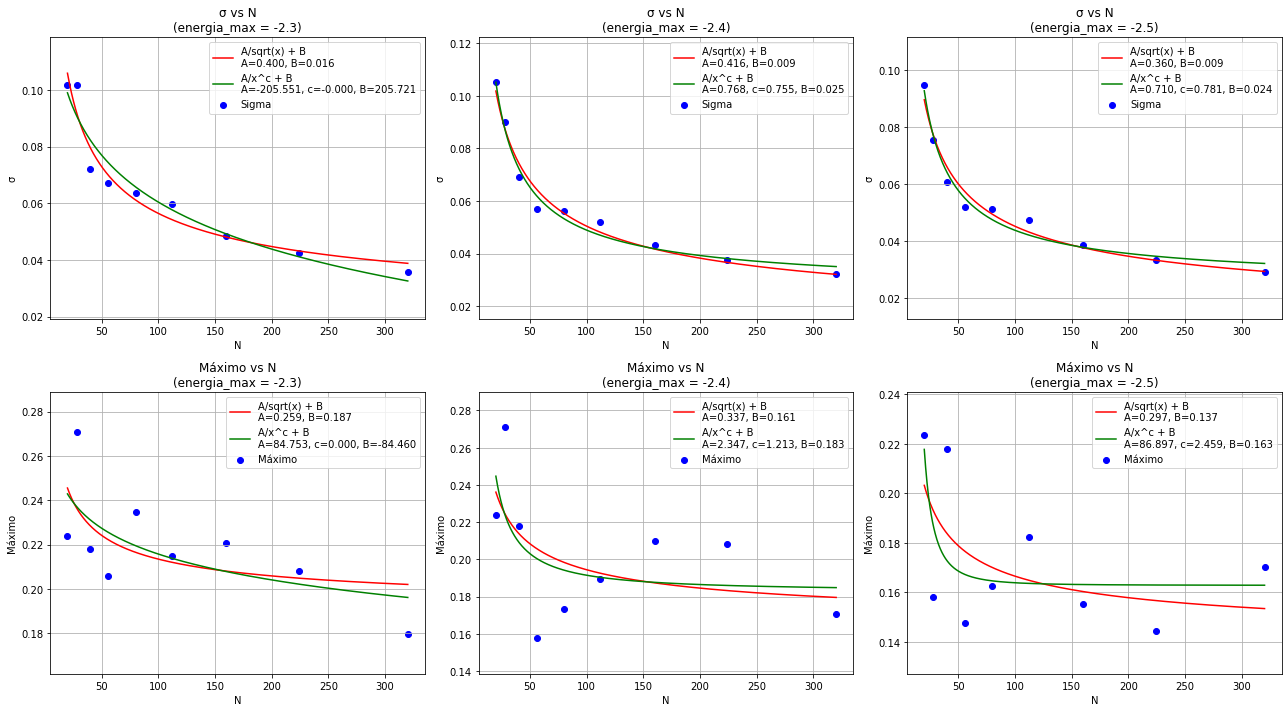

In [ ]:
(100-33)/(100-1)